In [1]:
from sklearn.datasets import load_iris 
#iris dataset is preloaded in sklearn.datasets contains feature data and target labels 

In [2]:
iris = load_iris()
#function that calls iris dataset and loads it to the storage variable as an object
print(isinstance(iris,dict))
#after checking for all classes we found that the iris dataset is in form of dictionery
numSamples, numFeatures= iris.data.shape
#the no. of columns = the features of dataset and no. of samples = no. of rows
print (numFeatures)

True
4


In [3]:
print(list(iris.target_names))
#iris.target_names is an attribute to the iris object. It contains the no. of target classes 
#for classification of iris dataset.In the pre-loaded dataset features and target are seperated. 
#to avoid preprocessing

['setosa', 'versicolor', 'virginica']


In [4]:
from sklearn.decomposition import PCA
import pylab as plt

In [5]:
X=iris.data 
pca_iris=PCA(n_components=2,whiten=True).fit(X)
#PCA aims to transform the original features into a new set of uncorrelated features (principal components),
#where each principal component explains a certain amount of the variance in the data. 
#calling PCA with parameters n_components and whiten which means the n_components will have unit variance
X_pca=pca_iris.transform(X)
print(pca_iris.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


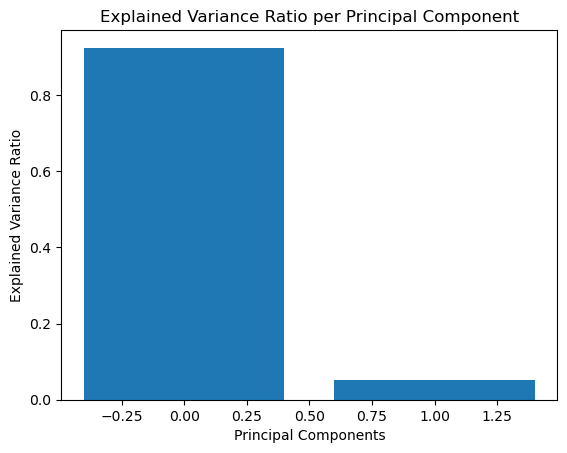

Information We managed to preserve : 0.9776852063187949


In [6]:
explained_variance_ratio=pca_iris.explained_variance_ratio_
#explained_variance_ratio contains the amount of information contained in the selected no of
plt.bar(range(2),explained_variance_ratio)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio per Principal Component")
plt.show()
print("Information We managed to preserve :", sum(explained_variance_ratio) )

In [7]:
from itertools import cycle 

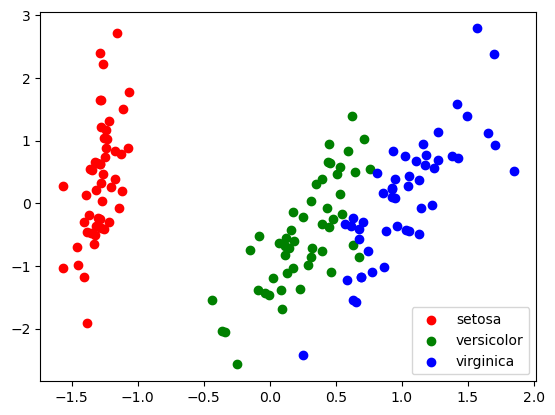

In [16]:
colors = cycle('rgb')
#This line defines a cycling iterator colors that generates the characters 'r', 'g', and 'b' 
#in a loop. These characters represent the colors red, green, and blue, respectively.
target_ids = range(len(iris.target_names))
plt.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
#the zip() function is used to simultaneously iterate through target id ,color and target name 
#it pairs the target id ,color and target name together for each iteration.
#typically used when we need to pair datapoints to values stored in different lists or arrays.
    plt.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],c=c, label=label)
    #the scatter plot plots clusterwise for each target class, it takes target id=0, searches 
    #the X_pca for the datapoints with the same target_id, takes feature 1 on x axis 
    #plt.scatter(X_pca[iris.target == i],[0]*sum(iris.target==i),c=c,label=label)
plt.legend()
plt.show()